In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['MEDV'] = dataset.target

#Q1 (1)
Normalize the data using StandardScaler from sklearn.

In [0]:
scaler = StandardScaler()
scaler.fit(df)
normalized_df = scaler.transform(df)
normalized_df

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

#Q1(2)
Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer.

In [0]:
def mse(prediction,y):
  return (mean_squared_error(prediction, y)/2)

In [0]:
y = df['MEDV'].values
X = []
for i in range(len(normalized_df)):
  X.append(normalized_df[i][0:-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [0]:
# analytical solution
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

f = 14 # number of features

X_test = np.vstack((np.ones(np.shape(X_test)[0]), X_test.T)).T
X = np.vstack((np.ones(np.shape(X_train)[0]), X_train.T)).T

In [0]:
error_train = []
error_validation = []
w_list = []
for λ in range(100):
  w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y_train))
  w_list.append(w)
  # prediction
  yPred_train = np.dot(X, w)

  yPred_validation = np.dot(X_test, w)

  error_train.append(mse(yPred_train, y_train))
  error_validation.append(mse(yPred_validation, y_test))

error at lamda = 0 is  10.820706376613158


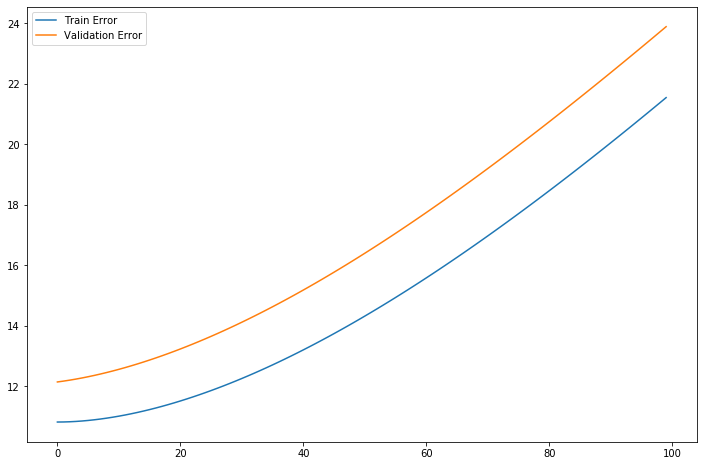

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(error_train, label='Train Error')
plt.plot(error_validation, label='Validation Error')
plt.legend()
print ("error at lamda = 0 is ", error_train[0])

#Q1(3)
What is the best lambda where the best fit occurs? Use this best lambda from here on out.

The best lamda works the best here is 0 when the  the test and validation errors are minimized.

#Q2

$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)} + \lambda\theta_j]$

#Q3
Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2.

Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda

The converge tranin error is around 22.38, which is very close to the minimized train error 21.7 when lamda = 0.

Text(0.5, 0, 'epoch')

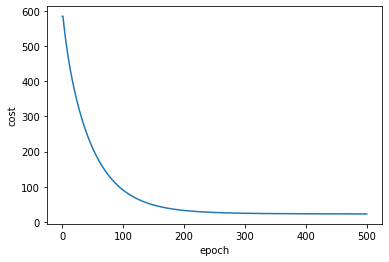

In [0]:
from sklearn.metrics import mean_squared_error

def gradiend_descent(X,y_train,lr):
  w = np.random.randn(14)
  E = []
  m = len(y_train)
  y_train = y_train
  prediction = np.dot(X,w)
  E.append(mean_squared_error(y_train, prediction))

  for i in range(500):
    prediction = np.dot(X,w)
    w = w - (1/m) * lr * (X.T.dot((prediction-y_train)))
    E.append(mean_squared_error(y_train, prediction))
  return E

E = gradiend_descent(X,y_train,0.01)
plt.plot(E)
plt.ylabel('cost')
plt.xlabel('epoch')

In [0]:
print (E[-1])

22.38580081121592


#Q4
Plot training error performance vs. number of epochs as a function of learning rate  η  for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each  η  being a different line.

For very low  η , gradient descent should be slow to converge. For very high  η , the error might be very unstable (i.e., not decreasing on every epoch).

In [0]:
learning_rate = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
error = dict.fromkeys(range(6))
count = 0
for lr in learning_rate:

  error[count] = gradiend_descent(X,y_train,lr)
  count = count + 1

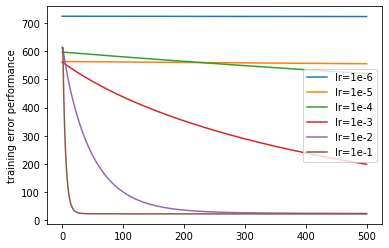

In [0]:
plt.plot(error[0],label = "lr=1e-6")
plt.plot(error[1],label = "lr=1e-5")
plt.plot(error[2],label = "lr=1e-4")
plt.plot(error[3],label = "lr=1e-3")
plt.plot(error[4],label = "lr=1e-2")
plt.plot(error[5],label = "lr=1e-1")
plt.ylabel("training error performance")
plt.legend(loc = 'center right')

#Q5
Implement a mini-batch version with a batch_size constant B. When B=1, it is stochastic gradient descent. When B=#train data points, it is full-batch. Anywhere in between is mini-batch.

Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

B = 1 leads to fastest convergence in terms of both gradient updates and "wall-clock time".

In [0]:
def batchGradientDescent(X, y, w, lr, iterations, λ, bs):
# m is the nunmber of data points
  start_time = time.time()
  m, n = X.shape
  w = np.random.randn(14,1)
  
# these are used to stored the cost and time
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)

  for i in range(iterations):
    

    data = np.hstack((X,y.reshape(-1,1)))
    data = np.random.permutation(data)
    X = data[:,:-1]
    y = data[:,-1].reshape((-1,1))

    for j in range(0, m, bs):
      X_j = X[j:j+bs]
      y_j = y[j:j+bs]
      m = len(y_j)
      prediction = np.dot(X_j,w)
      w = w - (1/m) * lr * (X_j.T.dot((prediction-y_j)))
    m = len(y)
    prediction = np.dot(X,w)
    costHistory[i] = mse(prediction,y)
    
    end_time = time.time()
    timeHistory[i] = end_time - start_time
  return w, costHistory, timeHistory

In [0]:
import time

B = [1,16,128,256,len(X)]
costHistory = dict.fromkeys(range(5))
timeHistory = dict.fromkeys(range(5))
count = 0

for b in B:
  w,costHistory[count], timeHistory[count]= batchGradientDescent(X, y_train, w, lr=0.01, iterations=20, λ=0, bs=b)
  count = count + 1

Text(0.5, 1.0, 'TrainErr vs Iterations')

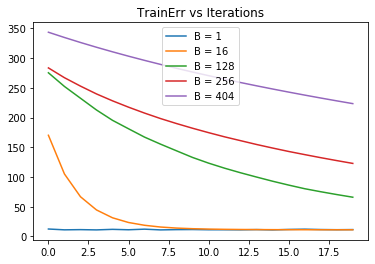

In [0]:
plt.plot(costHistory[0],label = 'B = 1')
plt.plot(costHistory[1],label = 'B = 16')
plt.plot(costHistory[2],label = 'B = 128')
plt.plot(costHistory[3],label = 'B = 256')
plt.plot(costHistory[4],label = 'B = 404')
plt.legend()
plt.title('TrainErr vs Iterations')

Text(0.5, 1.0, 'TrainErr vs gradient Update')

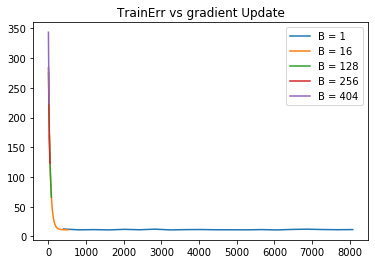

In [0]:
plt.plot(list(x for x in range(1,8081) if x%404 == 0),costHistory[0],label = 'B = 1')
plt.plot(list(x for x in range(1,521) if x%26 == 0),costHistory[1],label = 'B = 16')
plt.plot(list(x for x in range(1,81) if x%4 == 0),costHistory[2],label = 'B = 128')
plt.plot(list(x for x in range(1,41) if x%2 == 0),costHistory[3],label = 'B = 256')
plt.plot(costHistory[4],label = 'B = 404')
plt.legend()
plt.title('TrainErr vs gradient Update')

Text(0.5, 1.0, 'trainErr vs timeTaken')

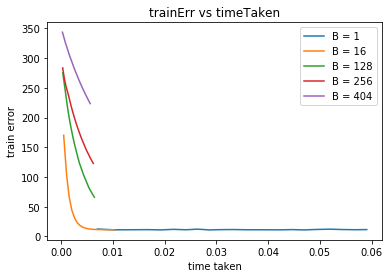

In [0]:
plt.plot(timeHistory[0],costHistory[0][0:21],label = 'B = 1')
plt.plot(timeHistory[1],costHistory[1][0:21],label = 'B = 16')
plt.plot(timeHistory[2],costHistory[2][0:21],label = 'B = 128')
plt.plot(timeHistory[3],costHistory[3][0:21],label = 'B = 256')
plt.plot(timeHistory[4],costHistory[4][0:21],label = 'B = 404')
plt.legend()
plt.ylabel('train error')
plt.xlabel('time taken')
plt.title('trainErr vs timeTaken')

#Q6
1. Switch to absolute error for loss but still use  L2  regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]
2. Tune  η  and B to obtain good performance (fast convergence to minimum error, but not noisy). Is it easier to train with squared error or absolute error, why? Show some plots that help you demonstrate this point and explain. [1]

1. With L2 regularization,
$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m|h_\theta (x^{(i)}) - y^{(i)}| + \lambda\sum_{j=1}^n\theta^2_j]$

$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{2m}[\sum_{i=1}^m\frac{h_\theta x^{(i)} - y^{(i)}}{|h_\theta x^{(i)} - y^{(i)}|} x_j^{(i)}+ 2\lambda\theta_j]$

2. Choose learning rate = 0.01 and batch size = 1 since these two hyperparameters hava a relative fast convergence and does not have noise. Square error is easier to train bacause it takes less time to converge as shown in the last trainErr vs timeTaken plots in Q5 and Q6.


In [0]:
def batchGradientDescent_abs(X, y, w, lr, iterations, λ, bs):
# m is the nunmber of data points
  start_time = time.time()
  m, n = X.shape
  w = np.random.randn(14,1)
# these are used to stored the cost and time
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)

  for i in range(iterations):

    data = np.hstack((X,y.reshape(-1,1)))
    data = np.random.permutation(data)
    X = data[:,:-1]
    y = data[:,-1].reshape((-1,1))

    for j in range(0, m, bs):
      X_j = X[j:j+bs]
      y_j = y[j:j+bs]
      m = len(y_j)
      prediction = np.dot(X_j,w)
      w = w - 1/(2*m) * lr * (X_j.T.dot(((prediction-y_j)/np.abs(prediction-y_j))))
    m = len(y)
    prediction = np.dot(X,w)
    costHistory[i] = mse(prediction,y)

    end_time = time.time()
    timeHistory[i]=end_time - start_time
  return w, costHistory, timeHistory

#tuning learning rate

In [0]:
import time
from sklearn.metrics import mean_absolute_error
learning_rate = [1e-4,1e-3,1e-2,1e-1,0.2,0.3]

costHistory_abs = dict.fromkeys(range(6))
timeHistory_abs = dict.fromkeys(range(6))
costHistory_squ = dict.fromkeys(range(6))
timeHistory_squ = dict.fromkeys(range(6))

count = 0
for lr in learning_rate:
  w,costHistory_abs[count], timeHistory_abs[count]= batchGradientDescent_abs(X, y_train, w, lr, iterations=20, λ=0, bs=32)
  count = count + 1

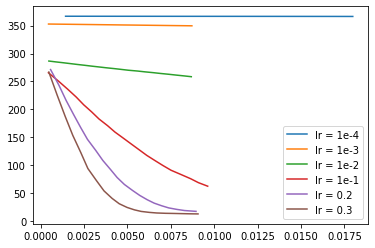

In [0]:
plt.plot((timeHistory_abs[0]),costHistory_abs[0][0:21],label = 'lr = 1e-4')
plt.plot((timeHistory_abs[1]),costHistory_abs[1][0:21],label = 'lr = 1e-3')
plt.plot((timeHistory_abs[2]),costHistory_abs[2][0:21],label = 'lr = 1e-2')
plt.plot((timeHistory_abs[3]),costHistory_abs[3][0:21],label = 'lr = 1e-1')
plt.plot((timeHistory_abs[4]),costHistory_abs[4][0:21],label = 'lr = 0.2')
plt.plot((timeHistory_abs[5]),costHistory_abs[5][0:21],label = 'lr = 0.3')
plt.legend()

#tuning B

In [0]:
B = [1,16,128,256,404]

costHistory_abs = dict.fromkeys(range(6))
timeHistory_abs = dict.fromkeys(range(6))
costHistory_squ = dict.fromkeys(range(6))
timeHistory_squ = dict.fromkeys(range(6))

count = 0
for b in B:
  w,costHistory_abs[count], timeHistory_abs[count]= batchGradientDescent_abs(X, y_train, w, lr= 0.01, iterations=20, λ=0, bs=b)
  count = count + 1

Text(0.5, 1.0, 'trainErr vs timeTaken')

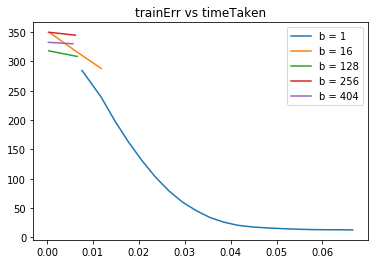

In [0]:
plt.plot((timeHistory_abs[0]),costHistory_abs[0][0:21],label = 'b = 1')
plt.plot((timeHistory_abs[1]),costHistory_abs[1][0:21],label = 'b = 16')
plt.plot((timeHistory_abs[2]),costHistory_abs[2][0:21],label = 'b = 128')
plt.plot((timeHistory_abs[3]),costHistory_abs[3][0:21],label = 'b = 256')
plt.plot((timeHistory_abs[4]),costHistory_abs[4][0:21],label = 'b = 404')

plt.legend()
plt.title('trainErr vs timeTaken')

Text(0.5, 1.0, 'TrainErr vs gradient Update')

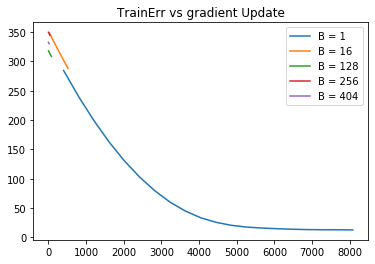

In [0]:
plt.plot(list(x for x in range(1,8081) if x%404 == 0),costHistory_abs[0],label = 'B = 1')
plt.plot(list(x for x in range(1,521) if x%26 == 0),costHistory_abs[1],label = 'B = 16')
plt.plot(list(x for x in range(1,81) if x%4 == 0),costHistory_abs[2],label = 'B = 128')
plt.plot(list(x for x in range(1,41) if x%2 == 0),costHistory_abs[3],label = 'B = 256')
plt.plot(list(x for x in range(1,21) if x%1 == 0),costHistory_abs[4],label = 'B = 404')
plt.legend()
plt.title('TrainErr vs gradient Update')

Text(0.5, 1.0, 'TrainErr vs Iterations')

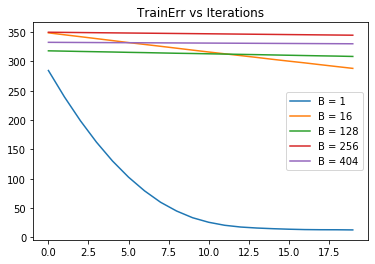

In [0]:
plt.plot(costHistory_abs[0],label = 'B = 1')
plt.plot(costHistory_abs[1],label = 'B = 16')
plt.plot(costHistory_abs[2],label = 'B = 128')
plt.plot(costHistory_abs[3],label = 'B = 256')
plt.plot(costHistory_abs[4],label = 'B = 404')

plt.legend()
plt.title('TrainErr vs Iterations')